# <center> Simulateur de chatbot</center>

In [1]:
%matplotlib inline
import time, sys, json
import requests
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#url = "http://127.0.0.1:5000/"
url = ""
id = ''

### Tests messages : 

In [9]:
texte = "Salut"
data = generate_message(texte)
SendRequest(url,json.dumps(data)) #POST

'Requete envoyee'

In [30]:
longitude = 7.7306702955462
latitude = 44.815372070653
data = generate_geoloc(longitude,latitude,id)
SendRequest(url,json.dumps(data)) #POST

nothing


True

In [ ]:
payload = "Contact"
title = "Nous contacter"
data = generate_postback(payload,title,id)
SendRequest(url,json.dumps(data)) #POST

### Tests GET :

In [28]:
SendRequest(url) #GET

Wrong Verify Token


True

### Performances :

In [61]:
liste_time = []
nombre_essais = 15
for i in range(nombre_essais):
    t0 = time.clock()
    texte = "magasin"
    data = generate_message(texte,id)
    SendRequest(url,json.dumps(data)) #POST
    time_process = (time.clock() - t0)/60.
    liste_time.append(time_process)
    sys.stdout.write("\r%i requetes sur %i " % (i+1,nombre_essais))
    sys.stdout.flush()
print(liste_time)

15 requetes sur 15 [0.0007854999999999872, 0.0006294333333333253, 0.0006143166666666626, 0.0005300999999999927, 0.0006609833333333389, 0.0005059999999999991, 0.0006683999999999912, 0.0005510166666666667, 0.0005908666666666562, 0.0005767833333333232, 0.0005893166666666616, 0.0006009333333333385, 0.0004921166666666643, 0.000670833333333339, 0.000697650000000009]


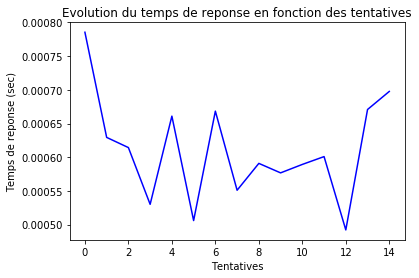

In [62]:
plt.plot([i for i in range(len(liste_time))],liste_time, c = "blue")
#plt.scatter([i for i in range(len(liste_time))],liste_time, c = "blue") # Sous forme de points
plt.xlabel('Tentatives')
plt.ylabel('Temps de reponse (sec)')
plt.title('Evolution du temps de reponse en fonction des tentatives')

### FONCTIONS :

In [4]:
def generate_message(texte,id):
    data_message = {'object': 'page', 'entry': [{'time': 1514581145313, 'id': id, 'messaging': [{'recipient': {'id': '1437816462930392'}, 'timestamp': 1514581144420, 'sender': {'id': id}, 'message': {'text': texte, 'seq': 343650, 'mid': 'mid.$cAAUbr_P_fdfgdce1Vd7ZFgpBKQlMM-0'}}]}]}
    return data_message

def generate_postback(payload,title,id):
    data_postback = {'object': 'page', 'entry': [{'time': 1514581270208, 'id': id, 'messaging': [{'postback': {'payload': payload, 'title': title}, 'timestamp': 1514581270208, 'sender': {'id': id}, 'recipient': {'id': id}}]}]}
    return data_postback

def generate_geoloc(longitude,latitude,id):
    url = "https://l.facebook.com/l.php?u=https%3A%2F%2Fwww.bing.com%2Fmaps%2Fdaspx%3Fv%3D2%26pc%3DFACEBK%26mid%3D8100%26where1%3D44.815372070653%252C%2B6.1906702955462%26FORM%3DFBKPL1%26mkt%3Den-US&h=ATObpkzxuBlS7IUf5TAw000Ya9uq9uDoxyNsWT7BLOruwILEIqDF6JYc8z-2yXAFKpuD3LfwVnwFEr3RLI3ZlWdBJF6Xm3Hpjwy1EZqLqw2DPkxykw&s=1&enc=AZNHAyu0wJIaJYjoWYcMlv3Nf5HAA9TgmJ5j5-hJv0FcByeFoVs9_ocEE5ZZ41hvFwpZ2BIXbdTZmfayA_Esylwp"
    title = "Florian's Location"
    data_geo = {'entry': [{'time': 1514583295664, 'messaging': [{'timestamp': 1514583294921, 'recipient': {'id': id}, 'sender': {'id': id}, 'message': {'seq': 343703, 'mid': 'mid.$cAAUbr_P_rem1XhLyVgpDL-zSvMV', 'attachments': [{'url': url, 'type': 'location', 'title': title, 'payload': {'coordinates': {'long': longitude, 'lat': latitude}}}]}}], 'id': id}], 'object': 'page'}
    return data_geo
def generate_pouce(id): # Pouce :
    url = "https://scontent-lax3-2.xx.fbcdn.net/v/t39.1997-6/851557_369239266556155_759568595_n.png?_nc_ad=z-m&_nc_cid=0&oh=0ef8de1568b7089f8197a3edf15d8d71&oe=5AC537DC"
    sticker_id = 369239263222822
    data ={'entry': [{'id': id, 'messaging': [{'message': {'seq': 343013, 'sticker_id': 369239263222822, 'attachments': [{'type': 'image', 'payload': {'sticker_id': sticker_id, 'url': url}}], 'mid': 'mid.$cAAUbFEzefJNm1YlJT1gpERfyNcs6'}, 'recipient': {'id': id}, 'timestamp': 1514584408399, 'sender': {'id': id}}], 'time': 1514584409176}], 'object': 'page'}
    return data
def generate_image(id):
    url = "https://scontent-lax3-2.xx.fbcdn.net/v/t34.0-12/26175070_10215465868019290_783007809_n.png?_nc_ad=z-m&_nc_cid=0&oh=0e087ad54erfsdc02b194ce0583433b4b&oe=5A490583"
    data = {'entry': [{'id': id, 'messaging': [{'message': {'seq': 343715, 'attachments': [{'type': 'image', 'payload': {'url': url}}], 'mid': 'mid.$cAAUbr_P_fJNmPKLB1gpEZv8Ybra'}, 'recipient': {'id': id}, 'timestamp': 1514584050663, 'sender': {'id': id}}], 'time': 1514584551482}], 'object': 'page'}
    return data
def generate_gif():
    url = ""
    data = {}
    return data

In [8]:
#USER_AGENT = 'Instagram 10.26.0 Android ({android_version}/{android_release}; 320dpi; 720x1280; {manufacturer}; {model}; armani; qcom; en_US)'.format(**DEVICE_SETTINTS)
LastResponse = None
def SendRequest(url, post = None):
    s = requests.Session()
    #s.headers.update ({'Connection' : 'close',
    #                            'Accept' : '*/*',
    #                            'Content-type' : 'application/x-www-form-urlencoded; charset=UTF-8',
    #                            'Cookie2' : '$Version=1',
    #                            'Accept-Language' : 'en-US',
    #                            'User-Agent' : USER_AGENT})
    if (post != None): # POST
        response = s.post(url, data=post)
    else: # GET
        response = s.get(url)
    print response.status_code
    if response.status_code == 200:
                LastResponse = response
                try:
                    LastJson = json.loads(response.text)
                    # data = json.loads(request.data.decode())
                    #print LastJson
                except:pass 
                    print response.text
                return "Requete envoyee"
    else:
            print ("Request return " + str(response.status_code) + " error!")
            try: # for debugging
                LastResponse = response
                LastJson = json.loads(response.text)
            except:
                print response.text
                pass
            return False

IndentationError: unexpected indent (<ipython-input-8-cf2dd7cd1af0>, line 23)

### HASH :

In [12]:
import hashlib
password = raw_input("Entrez votre mot de passe : ").strip()
username = raw_input("Entrez votre login : ").strip()
m = hashlib.md5()
m.update(username.encode('utf-8') + password.encode('utf-8'))
print m.hexdigest()

Entrez votre mot de passe : a
Entrez votre login : b
<md5 HASH object @ 0x1100fcaf8>
